# 线性回归

## 算法实现

In [1]:
import random
import torch
from d2l import torch as d2l

In [2]:
# 生成数据集
def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b  # 线性回归表达式matul为矩阵乘法
    y += torch.normal(0, 0.01, y.shape)  # 误差项
    return X, y.reshape(-1, 1)

In [3]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [4]:
features.shape, true_w.shape

(torch.Size([1000, 2]), torch.Size([2]))

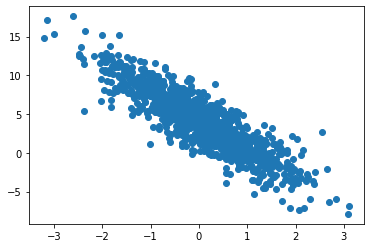

In [5]:
import matplotlib.pyplot as plt
plt.scatter(features[:, 1].detach().numpy(), 
            labels.detach().numpy())

In [6]:
# 读取数据
def data_iter(batch_size, features, labels):
    indices = list(range(len(features)))
    seed = random.sample(indices, batch_size)  # 随机采样
    batch_indices = torch.tensor(seed)
    
    return features[batch_indices], labels[batch_indices]

In [7]:
batch_size = 10
data_iter(batch_size, features, labels)

(tensor([[ 1.9536, -0.1682],
         [ 0.3390, -1.1273],
         [-0.8924,  1.9423],
         [ 1.5252, -0.5477],
         [ 1.4530,  0.7911],
         [-0.0707, -2.4633],
         [ 1.0008, -0.9420],
         [ 1.0262, -0.4502],
         [ 0.3523, -1.5049],
         [ 0.1580,  1.1880]]),
 tensor([[ 8.6646],
         [ 8.7149],
         [-4.1769],
         [ 9.1149],
         [ 4.4135],
         [12.4515],
         [ 9.4139],
         [ 7.7677],
         [10.0351],
         [ 0.4857]]))

In [8]:
# 初始化参数
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [9]:
# 模型
def linreg(X, w, b):
    return torch.matmul(X, w) + b

In [10]:
# 损失函数
def loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [11]:
# 优化算法
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [12]:
# 训练
lr = 0.03
num_epoch = 100
net = linreg
loss = loss

In [13]:
for epoch in range(num_epoch):
    X, y = data_iter(batch_size, features, labels)  # 生成batch
    l = loss(net(X, w, b), y)  # 计算损失
    l.sum().backward()  # 计算梯度
    sgd([w, b], lr, batch_size)  # 更新参数
    
    with torch.no_grad():
        print(loss(net(features, w, b), labels).mean().item())

15.429717063903809
14.034073829650879
12.860908508300781
12.134554862976074
11.136482238769531
10.591960906982422
9.587727546691895
8.895339965820312
8.299766540527344
7.892074108123779
7.4004340171813965
6.954316139221191
6.379141330718994
6.125821590423584
5.796535015106201
5.371085166931152
5.025866508483887
4.752532482147217
4.579625606536865
4.352716445922852
4.098711013793945
3.6842727661132812
3.4257960319519043
3.157592296600342
2.9974417686462402
2.8491899967193604
2.675419807434082
2.5962021350860596
2.4792699813842773
2.357949733734131
2.2103893756866455
2.030702829360962
1.8900376558303833
1.6809784173965454
1.5783486366271973
1.4335718154907227
1.321648359298706
1.2407723665237427
1.2089781761169434
1.1303491592407227
1.0496695041656494
0.977771520614624
0.9454294443130493
0.924163281917572
0.8913150429725647
0.8074803352355957
0.7829912900924683
0.7315351963043213
0.6791532039642334
0.6389425992965698
0.6025265455245972
0.5596216320991516
0.5410734415054321
0.481634348630

In [14]:
w, b

(tensor([[ 1.8746],
         [-3.2770]], requires_grad=True),
 tensor([4.0138], requires_grad=True))

In [15]:
true_w, true_b

(tensor([ 2.0000, -3.4000]), 4.2)

## 基于pytorch快速实现

In [16]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)

In [17]:
import numpy as np
from torch.utils import data
def load_array(data_arrays, batch_size, is_train=True):
    # pytorch数据迭代器
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 10
data_iter = load_array((features, labels), batch_size)

In [18]:
# next获取迭代器第一项
next(iter(data_iter))

[tensor([[ 0.8423, -2.0893],
         [ 1.9727, -1.4814],
         [-1.4002,  0.7915],
         [ 2.5332, -0.9624],
         [-0.9161, -0.5992],
         [ 1.9685, -0.2768],
         [ 0.6796,  1.1067],
         [-1.3654, -0.5103],
         [-0.4304,  0.7225],
         [-0.3904,  1.1188]]),
 tensor([[12.9919],
         [13.1710],
         [-1.3002],
         [12.5530],
         [ 4.4138],
         [ 9.0935],
         [ 1.8102],
         [ 3.2108],
         [ 0.8891],
         [-0.3865]])]

In [19]:
from torch import nn
net = nn.Sequential(nn.Linear(2, 1))

In [20]:
# 参数初始化
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [21]:
loss = nn.MSELoss()

In [22]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.03)

In [23]:
# 训练
for epoch in range(10):
    for X, y in data_iter:
        l = loss(net(X), y)
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
    
    print(loss(net(features), labels).mean().item())

0.00021845901210326701
0.0001028693513944745
0.00010233555076410994
0.00010341021697968245
0.00010253209620714188
0.00010260113776894286
0.00010310013749403879
0.00010284079326083884
0.00010338085849070922
0.00010437140008434653


# Softmax回归

In [24]:
import torch
import torchvision
from torch.utils import data
from torchvision import transforms

In [25]:
# 读取数据集
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root="../data", train=True,
                                               transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(root="../data", train=False,
                                               transform=trans, download=True)


In [26]:
mnist_train[0][0].shape  # 1个通道，28*28

torch.Size([1, 28, 28])

In [27]:
batch_size = 256
train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True, 
                             num_workers=4)
test_iter = data.DataLoader(mnist_test, batch_size, shuffle=False, 
                             num_workers=4)

## 算法实现

In [28]:
# 初始化参数
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)
net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

In [29]:
# 损失函数
loss = nn.CrossEntropyLoss()
# 优化器
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)

In [30]:
def accuracy(y_hat, y):  #@save
    """计算预测正确的数量。"""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

In [31]:
def evaluate_accuracy(net, data_iter):  #@save
    """计算在指定数据集上模型的精度。"""
    if isinstance(net, torch.nn.Module):
        net.eval()  # 将模型设置为评估模式
    metric = Accumulator(2)  # 正确预测数、预测总数
    for X, y in data_iter:
        metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

In [32]:
class Accumulator:  #@save
    """在`n`个变量上累加。"""
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [33]:
# 训练
for epoch in range(10):
    for X, y in train_iter:
        l = loss(net(X), y)
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
    print(evaluate_accuracy(net, test_iter))

0.7596
0.8087
0.8143
0.8232
0.8288
0.8254
0.823
0.8317
0.8325
0.8345
